<a href="https://colab.research.google.com/github/anilkrp/TensorFlow-Tutorial/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(trian_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

trian_images, test_images = trian_images / 255, test_images / 255

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog','Horse', 'Ship', 'Truck']

### Befor testing any image, should be resize pixel in **32X32**

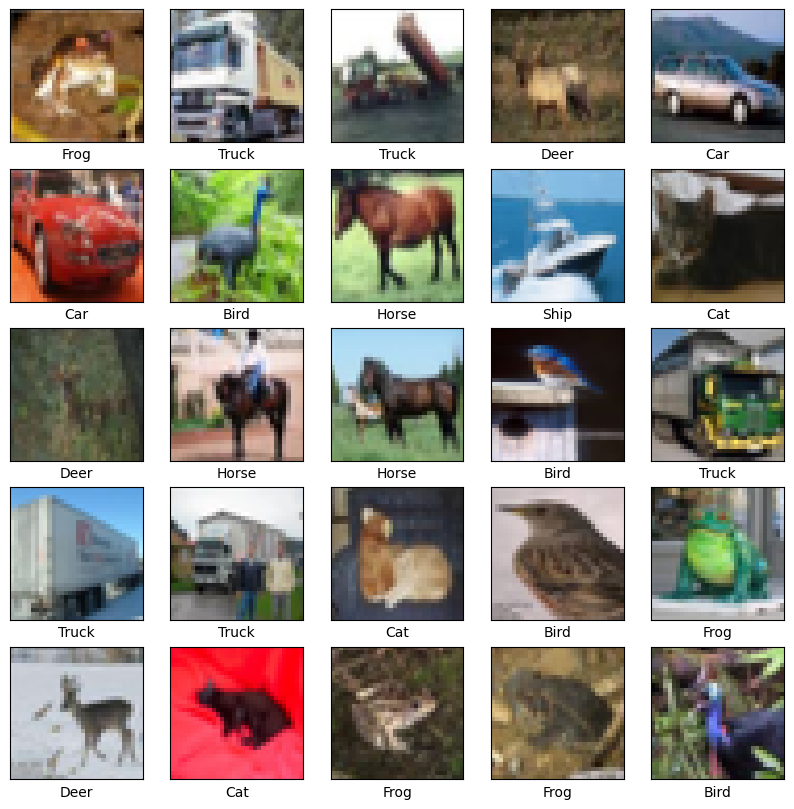

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trian_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 10

history = model.fit(trian_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4889 - accuracy: 0.4565 - val_loss: 1.2616 - val_accuracy: 0.5461
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1191 - accuracy: 0.6028 - val_loss: 1.0743 - val_accuracy: 0.6144
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9581 - accuracy: 0.6644 - val_loss: 0.9773 - val_accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8576 - accuracy: 0.6986 - val_loss: 0.8724 - val_accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7759 - accuracy: 0.7281 - val_loss: 0.8975 - val_accuracy: 0.6922
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7134 - accuracy: 0.7513 - val_loss: 0.8736 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6707 - accuracy: 0.7649 - val_loss: 0.8683 -

In [59]:
Loss, Acc = model.evaluate(test_images, test_labels)
print(f"Loss: {Loss}")
print(f"Accuracy: {Acc}")

313/313 [==============================] - 4s 12ms/step - loss: 0.8904 - accuracy: 0.7199
Loss: 0.8904265761375427
Accuracy: 0.7199000120162964


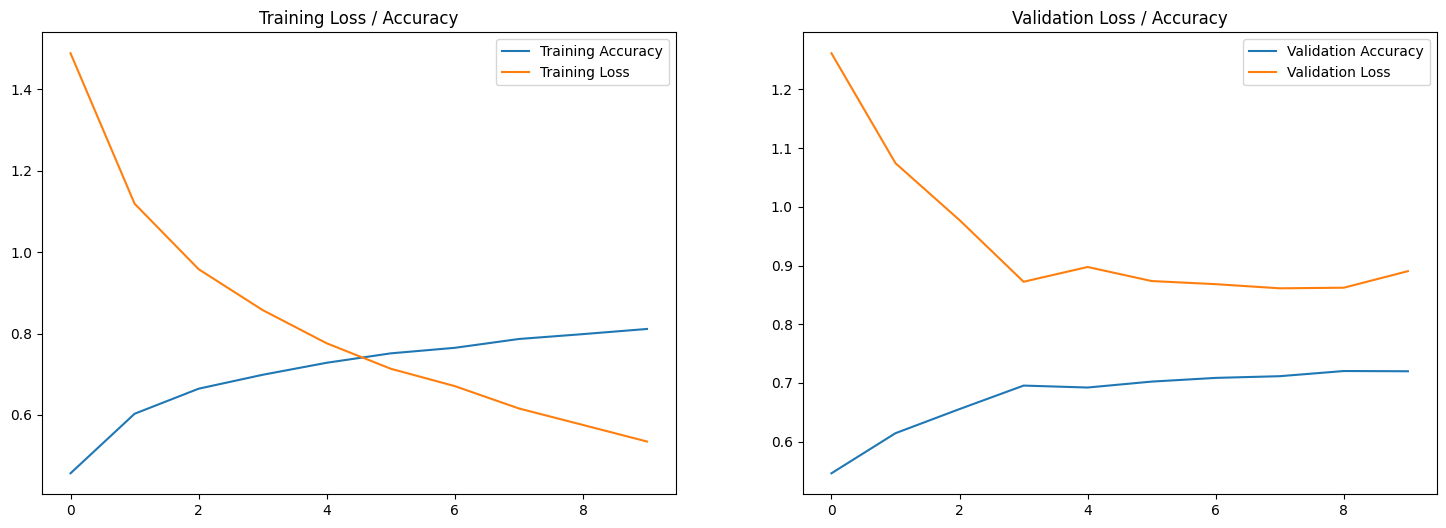

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss / Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss / Accuracy')

plt.show()


In [60]:
model.save('image_classification.model')

In [61]:
model = models.load_model('image_classification.model')

1/1 [==============================] - 0s 22ms/step


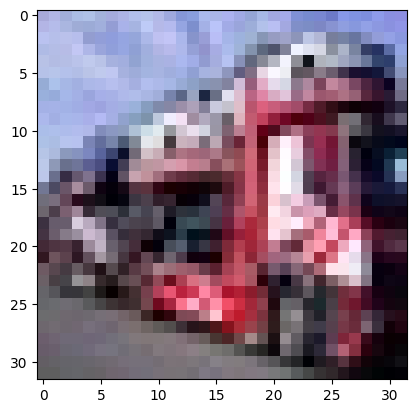

Perdiction is Truck


In [73]:
img = cv.imread('car_truck.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
pred = model.predict(np.array([img])/255)
index = np.argmax(pred)
plt.show()
print(f"Perdiction is {class_names[index]}")
